In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import random

# Ex.1: Brownian motion

Brownian motion $X_t$ (as an example of Wiener process) is a stochastic process. One of it's form is:

$$B(0) = B_0; \quad B(t+dt) - B(t) = N(0; \sigma^2dt; t; t+dt),$$
where $0$ is mean and $\sigma^2dt$ is variance.

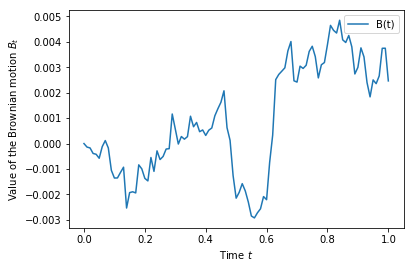

In [2]:
# Simple example 
# Process parameters
sigma = 0.25
T = 1
N = 100
dt = T / N

# Initial condition.
b0 = 0
t0 = 0

# Number of iterations to compute.
IterList = range(N+1)
BList = []
TList = []

# Iterate to compute the steps of the Brownian motion.
for i in IterList:
    BList.append(b0)
    TList.append(t0)
    b0 = b0 + norm.rvs(scale=sigma**2*dt)
    t0 = t0 + dt
    
fig1, ax = plt.subplots()
plt.plot(TList, BList, label = 'B(t)')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Value of the Brownian motion $B_t$')
plt.show()
fig1.savefig('Brownian motion')

# Ex. 2: Brownian bridge

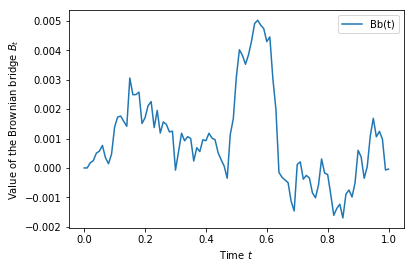

In [3]:
# Parameter of the assymptotic line

c_1 = BList[N-1]
BbList = []
AprList = []
Bb0 = 0
Apr0 = c_1*Bb0

for i in IterList:
    BbList.append(Bb0)
    AprList.append(Apr0)
    Bb0 = c_1*TList[i] - BList[i]
    Apr0 = c_1*TList[i]
    
fig2, ax = plt.subplots()
#plt.plot(TList, BList, label = 'B(t)')
#plt.plot(TList, AprList, label = 'Apr.l.f.(t)')
plt.plot(TList, BbList, label = 'Bb(t)')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Value of the Brownian bridge $B_t$')
plt.show()
fig2.savefig('Brownian bridge')

# Random generator

In [5]:
def Random3(p1, p2):
    x = random.random()
    if x <= p1:
        return 1
    else:
        if x>p1 and x<=p1+p2:
            return 2
        else:
            return 3

# Avellaneda code

C:\Users\root\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


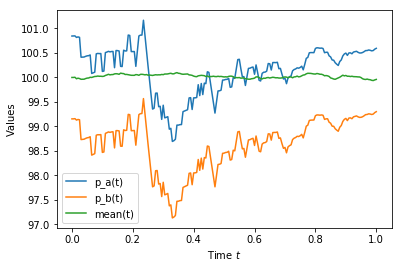

final wealth = 499.8750262823307 ; final q = 5


In [387]:
#Entering parametres of the system block

s0 = 100 # start value of the mean price
T = 1 # time of the simulation
sigma = 2 # Brownian parameter
dt = 0.005 # time step
# start value of the inventory variable
gamma = 0.1 # paramenter of the agent's value function
k = 1.5 # parameter of the exponential (lambda) law
A = 140 # start value of lambda

def r(s, t, q): # reservation price function
    return (s - q*gamma*(sigma**2)*(T-t))

def delta_sum(t): # doubled delta function
    return (gamma*(sigma**2)*(T-t) + (2/gamma)*np.log(1+gamma/k))

def Lambda(d): # parameter of the jump probability (parameter for ask and bid jump probabilities are equal)
    return A*np.exp(-k*d)*dt

# Initial condition
t0 = 0; TList = np.linspace(0, T, T/dt+1) # time
m0 = s0; mList = [] # mid price
q0 = 0; qList = [] # inventory
r0 = r(m0, t0, q0); rList = [] # reservation price
delta_sum0 = delta_sum(t0); delta_sumList = [] # doubled delta 
w0 = m0 * q0; wList = [] # wealth 


# Body of the main cycle
for t in TList:
    mList.append(m0)
    rList.append(r0)
    delta_sumList.append(delta_sum0)
    qList.append(q0)
    wList.append(w0)
    
    flag = Random3(Lambda(delta_sum0/2), Lambda(delta_sum0/2))
    if  flag == 1:
        q0 -= 1
        w0 += m0 + delta_sum0 / 2 
    elif flag == 2:
        q0 += 1
        s0 -= m0 - delta_sum0 / 2
    #m0 += sigma*norm.rvs(scale=1**2*dt)*m0
    m0 += sigma*norm.rvs(scale=1**2*dt)
    w0 = q0 * m0
    r0 = r(m0, t, q0)
    delta_sum0 = delta_sum(t)

p_aList = rList + np.array(delta_sumList) / 2
p_bList = rList - np.array(delta_sumList) / 2

#Visualisation of the results

fig3, ax = plt.subplots()

plt.plot(TList, p_aList, label = 'p_a(t)')
plt.plot(TList, p_bList, label = 'p_b(t)')
plt.plot(TList, mList, label = 'mean(t)')
#plt.plot(TList, rList, label = 'reserv.pr.(t)')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Values')
plt.show()
fig3.savefig('The mid-price and the optimal bid and ask quotes')

diff = np.abs(np.array(mList) - np.array(rList))
MaxDiff = np.max(diff)
#print('gamma = ', gamma, '; max |m-r_p| = ', MaxDiff)
print('final wealth =', w0, '; final q =', q0)